In [1950]:
import numpy as np
import os
import pandas as pd
from sklearn.datasets import load_boston
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1951]:
boston = load_boston()

c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [1952]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Saving figure generated_data_plot


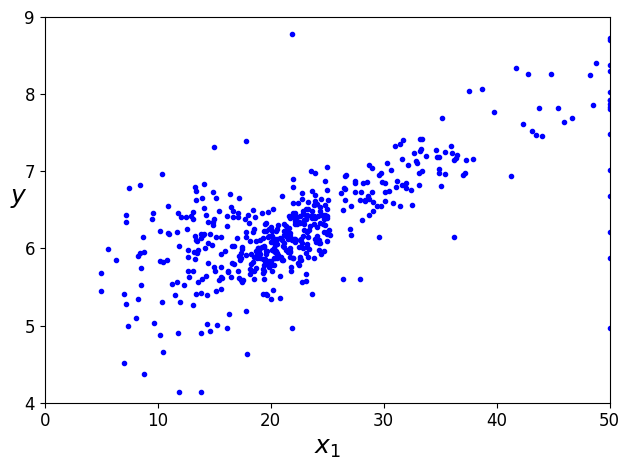

In [1953]:
y=df.RM
X=df.MEDV
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 50, 4, 9])
save_fig("generated_data_plot")
plt.show()

In [1954]:
X_b = np.c_[np.ones((506, 1)), X]  # add x0 = 1 to each instance
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta)

[5.08763867 0.05312235]


In [1955]:
Xn = np.array([[0], [50]])
XnB = np.c_[np.ones((2, 1)), Xn]  # add x0 = 1 to each instance
y_predict = XnB.dot(theta)
y_predict

array([5.08763867, 7.74375637])

Saving figure linear_model_predictions_plot


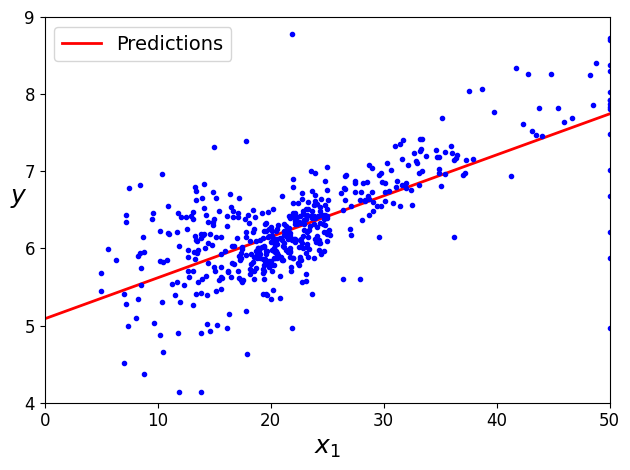

In [1956]:
plt.plot(Xn, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 50, 4, 9])
save_fig("linear_model_predictions_plot")
plt.show()

In [1957]:
X = np.array(X)
X.reshape(-1,1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [1958]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [1959]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)
print(lr.intercept_)
print(lr.coef_)
lr.predict(Xn)

5.117194093167345
[0.05160142]


array([5.11719409, 7.69726512])

In [1960]:
Z=df.NOX
y=df.MEDV

Saving figure generated_data_plot


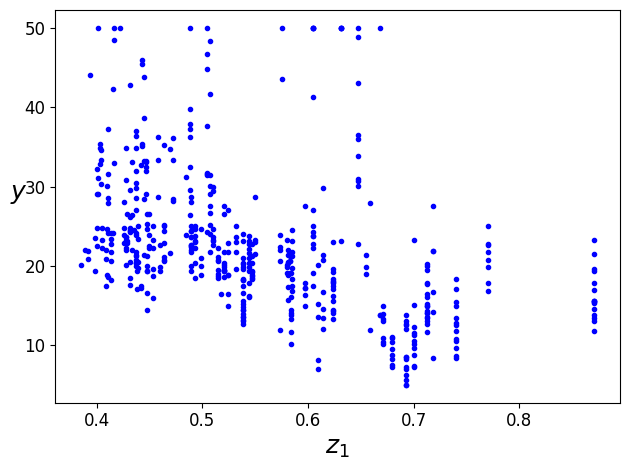

In [1961]:
plt.plot(Z, y, "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
save_fig("generated_data_plot")
plt.show()

In [1962]:

Z = np.array(Z)
Z.reshape(-1,1)



array([[0.538 ],
       [0.469 ],
       [0.469 ],
       [0.458 ],
       [0.458 ],
       [0.458 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.428 ],
       [0.428 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.41  ],
       [0.403 ],
       [0.41  ],
       [0.411 ],
       [0.453 

In [1963]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, train_size=0.8)

In [1964]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
Z_poly = poly_features.fit_transform(Z_train.reshape(-1,1))
Z[0]

0.538

In [1965]:
Z_poly[0]

array([0.472   , 0.222784])

In [1966]:

lr.fit(Z_poly, y_train)
lr.intercept_, lr.coef_

(55.611994132280444, array([-82.92664202,  39.72967747]))

Saving figure quadratic_predictions_plot


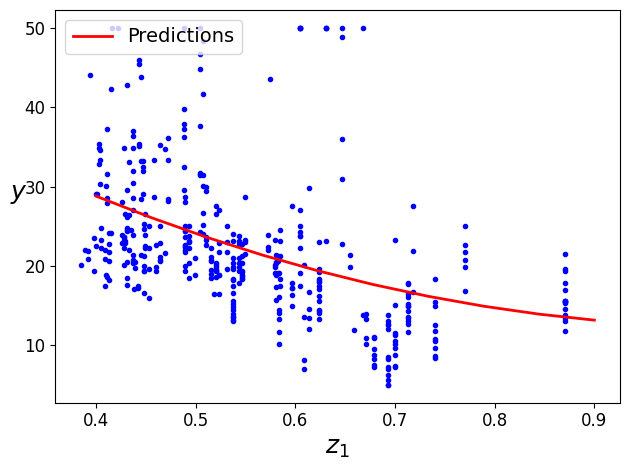

In [1967]:
Z_new=np.linspace(0.4,0.9, 10).reshape(10, 1)
Z_new_poly = poly_features.transform(Z_new)
y_new = lr.predict(Z_new_poly)
plt.plot(Z_train, y_train, "b.")
plt.plot(Z_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


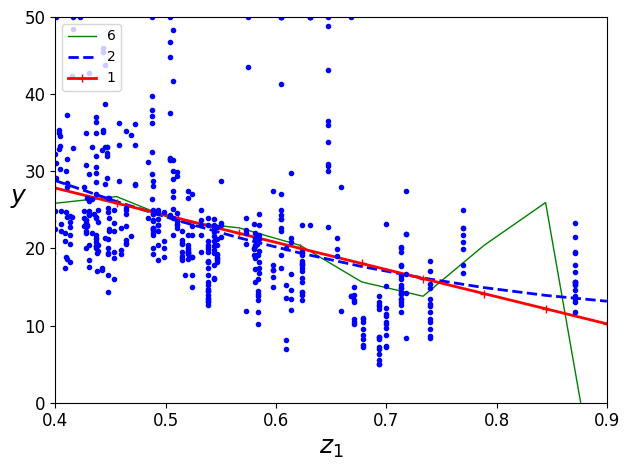

In [1968]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 6), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(Z_train.reshape(-1,1), y_train)
    y_newbig = polynomial_regression.predict(Z_new)
    plt.plot(Z_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(Z, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0.4,0.9, 0,50])
save_fig("high_degree_polynomials_plot")
plt.show()

In [1969]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    Z_train, Z_val, y_train, y_val = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(Z_train) + 1):
        model.fit(Z_train[:m].reshape(-1,1), y_train[:m])
        y_train_predict = model.predict(Z_train[:m])
        y_val_predict = model.predict(Z_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 

    plt.ylabel("RMSE", fontsize=14)      
    

C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(Z_train[:m].reshape(-1,1), y_train[:m])
C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype ind

Saving figure underfitting_learning_curves_plot


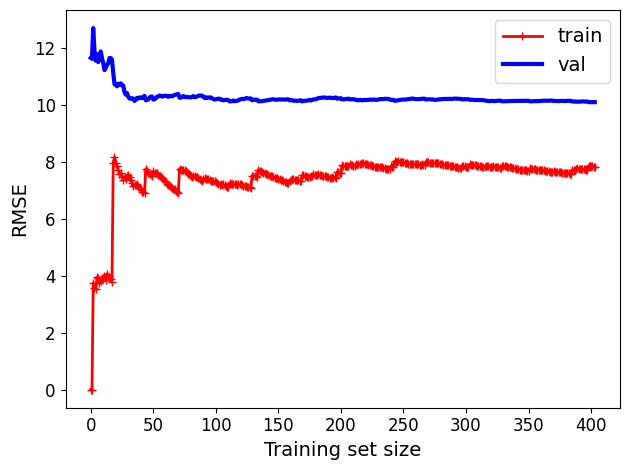

In [1970]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, Z.reshape(-1,1), y)                    
save_fig("underfitting_learning_curves_plot")   
plt.show()                                             

C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(Z_train[:m].reshape(-1,1), y_train[:m])
C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
C:\Users\silyo\AppData\Local\Temp\ipykernel_14672\3765622916.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype ind

Saving figure learning_curves_plot


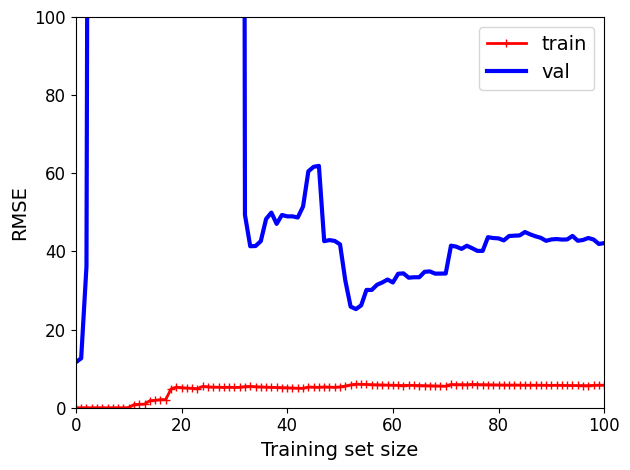

In [1971]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, Z, y)     
plt.axis([0, 100, 0, 100]) 
save_fig("learning_curves_plot") 
plt.show()             

In [1972]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(Z_train.reshape(-1,1), y_train)


Ridge(alpha=1)

In [1973]:
from sklearn.metrics import mean_squared_error
y_pred = ridge_reg.predict(Z_train.reshape(-1,1))
m = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {m:.2f}")


Mean Squared Error: 69.92


In [1974]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(Z_train.reshape(-1,1), y_train)
        y_new_regul = model.predict(Z_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(Z_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(Z_train, y_train, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([-20,20, 0,50])

Saving figure ridge_regression_plot


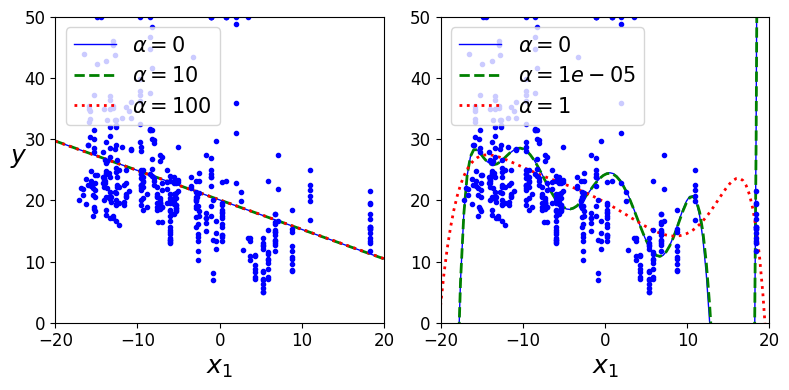

In [1975]:
mean = np.mean(Z_train, axis=0)
std = np.std(Z_train, axis=0)
Z_train = (Z_train - mean) / std
Z_train = (Z_train - mean) / std

Z_new = np.linspace(-20, 20, 100).reshape(100, 1)

# Plot the Ridge regression model
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
save_fig("ridge_regression_plot")
plt.show()

c:\Users\silyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+04, tolerance: 3.495e+00
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


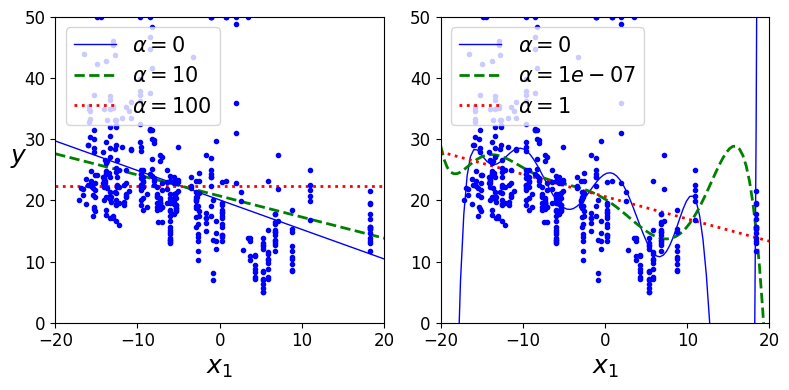

In [1976]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()